# TSLA Stock Price Prediction Using Machine Learning

## Introduction

Stock market prediction is a key area in the field of finance and machine learning. The price of a stock is influenced by various factors such as demand and supply, market trends, global news, and company performance.

In this project, we aim to predict the **future closing prices** of **Tesla Inc. (TSLA)** stock using its **historical data**. We use multiple machine learning models and visualization techniques to gain insights and build a prediction model.

This project involves complete end-to-end steps including:
- Exploratory Data Analysis (EDA)
- Data Preprocessing
- Data Visualization
- Model Building and Evaluation




## Problem Statement

The objective of this project is to **predict the future stock closing price of Tesla (TSLA)** based on historical market data (Open, High, Low, Close, Volume, etc.).

Predicting stock prices accurately can help investors and traders make better financial decisions. However, due to the volatile and non-linear nature of stock prices, this is a challenging task.

We aim to:
- Understand the underlying data patterns
- Use regression-based machine learning algorithms
- Compare model performances and finalize the best one


## Projected Outcome

By the end of this project, we aim to:

- Build a machine learning model that can predict Tesla's stock closing price with good accuracy.
- Perform feature analysis and data visualization to understand historical trends.
- Compare and evaluate multiple ML models (Linear Regression, Random Forest, Decision Tree, SVM, etc.).


In [36]:
import yfinance as yf # fetch historical stock data from Yahoo Finance.
import pandas as pd

In [37]:
#  Downloads Tesla stock price from Jan 2015 to Dec 2024.
tsla_data = yf.download('TSLA', start='2015-01-01', end='2024-12-31')

C:\Users\choma\AppData\Local\Temp\ipykernel_8576\2213713305.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla_data = yf.download('TSLA', start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [38]:
tsla_data.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [39]:
tsla_data.reset_index(inplace=True)

In [40]:
tsla_data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


## How to Use Past Data for Prediction?

### Problem:
We want to predict today's stock price using machine learning.  
But the model doesn't understand the concept of "time" by itself.

If we just give it today's data and ask it to predict today’s price, it won’t know how prices behave over time.


In [41]:
# Lag Features
tsla_data['Close_Lag1'] = tsla_data['Close'].shift(1)
tsla_data['Close_Lag2'] = tsla_data['Close'].shift(2)

In [42]:
tsla_data.head()

Price,Date,Close,High,Low,Open,Volume,Close_Lag1,Close_Lag2
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,,
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000,NaN,NaN
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500,14.620667,NaN
2,2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500,14.006000,14.620667
3,2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000,14.085333,14.006000
4,2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500,14.063333,14.085333


##  Adding Technical Indicators – Moving Averages

###  Problem:
Stock prices go up and down every day. This makes it hard for the model to understand the actual trend.


In [43]:
# Technical Indicators: Moving Averages
tsla_data['MA7'] = tsla_data['Close'].rolling(window=7).mean()
tsla_data['MA21'] = tsla_data['Close'].rolling(window=21).mean()

In [44]:
tsla_data.head(21)

Price,Date,Close,High,Low,Open,Volume,Close_Lag1,Close_Lag2,MA7,MA21
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,,,,
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000,NaN,NaN,NaN,NaN
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500,14.620667,NaN,NaN,NaN
2,2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500,14.006000,14.620667,NaN,NaN
3,2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000,14.085333,14.006000,NaN,NaN
4,2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500,14.063333,14.085333,NaN,NaN
5,2015-01-09,13.777333,13.998667,13.664000,13.928000,70024500,14.041333,14.063333,NaN,NaN
6,2015-01-12,13.480667,13.631333,13.283333,13.536667,89254500,13.777333,14.041333,14.010667,NaN
7,2015-01-13,13.616667,13.840667,13.394000,13.554667,67159500,13.480667,13.777333,13.867238,NaN
8,2015-01-14,12.846000,13.013333,12.333333,12.388667,173278500,13.616667,13.480667,13.701524,NaN


In [45]:
# Drop rows with NaNs (due to lagging and rolling)
tsla_data.dropna(inplace=True)

In [46]:
tsla_data.head()

Price,Date,Close,High,Low,Open,Volume,Close_Lag1,Close_Lag2,MA7,MA21
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,,,,
20,2015-02-02,14.062667,14.130000,13.553333,13.598000,62238000,13.573333,13.680000,13.646952,13.574762
21,2015-02-03,14.557333,14.691333,14.084667,14.214667,72393000,14.062667,13.573333,13.809524,13.571746
22,2015-02-04,14.570000,14.765333,14.453333,14.552667,49581000,14.557333,14.062667,13.923809,13.598603
23,2015-02-05,14.732667,15.032000,14.642667,14.658667,52843500,14.570000,14.557333,14.066762,13.629429
24,2015-02-06,14.490667,14.893333,14.433333,14.800000,48658500,14.732667,14.570000,14.238095,13.649778


### Set the Prediction Target

In [48]:
tsla_data['Target'] = tsla_data['Close']

In [49]:
tsla_data.head()

Price,Date,Close,High,Low,Open,Volume,Close_Lag1,Close_Lag2,MA7,MA21,Target
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,
20,2015-02-02,14.062667,14.130000,13.553333,13.598000,62238000,13.573333,13.680000,13.646952,13.574762,14.062667
21,2015-02-03,14.557333,14.691333,14.084667,14.214667,72393000,14.062667,13.573333,13.809524,13.571746,14.557333
22,2015-02-04,14.570000,14.765333,14.453333,14.552667,49581000,14.557333,14.062667,13.923809,13.598603,14.570000
23,2015-02-05,14.732667,15.032000,14.642667,14.658667,52843500,14.570000,14.557333,14.066762,13.629429,14.732667
24,2015-02-06,14.490667,14.893333,14.433333,14.800000,48658500,14.732667,14.570000,14.238095,13.649778,14.490667


## Train-Test Split Based on Time

###  Problem:
In time series data, future values depend on past values.
So, we can't split data randomly like normal ML problems.

In [51]:
# Time-based split
train_size = int(len(tsla_data) * 0.8)
train = tsla_data[:train_size]
test = tsla_data[train_size:]

## Train the Machine Learning Model

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [62]:
# Define features and target
features = ['Close_Lag1', 'Close_Lag2', 'MA7', 'MA21']
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']

In [63]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
X_train

Price,Close_Lag1,Close_Lag2,MA7,MA21
Ticker,,,,
20,13.573333,13.680000,13.646952,13.574762
21,14.062667,13.573333,13.809524,13.571746
22,14.557333,14.062667,13.923809,13.598603
23,14.570000,14.557333,14.066762,13.629429
24,14.732667,14.570000,14.238095,13.649778
...,...,...,...,...
2011,109.099998,123.150002,127.935715,159.186191
2012,112.709999,109.099998,123.928573,156.376191
2013,121.820000,112.709999,121.840001,152.970476


In [65]:
X_test

Price,Close_Lag1,Close_Lag2,MA7,MA21
Ticker,,,,
2016,113.639999,108.099998,114.127142,141.545238
2017,110.339996,113.639999,114.692856,138.366190
2018,113.059998,110.339996,115.701427,135.781905
2019,119.769997,113.059998,115.277141,133.182381
2020,118.849998,119.769997,115.282855,130.523809
...,...,...,...,...
2510,421.059998,436.170013,443.867144,393.966668
2511,430.600006,421.059998,447.588571,399.191430
2512,462.279999,430.600006,446.318573,404.693335


In [66]:
y_train

20       14.062667
21       14.557333
22       14.570000
23       14.732667
24       14.490667
           ...    
2011    112.709999
2012    121.820000
2013    123.180000
2014    108.099998
2015    113.639999
Name: Target, Length: 1996, dtype: float64

In [67]:
y_test

2016    110.339996
2017    113.059998
2018    119.769997
2019    118.849998
2020    123.220001
           ...    
2510    430.600006
2511    462.279999
2512    454.130005
2513    431.660004
2514    417.410004
Name: Target, Length: 499, dtype: float64

In [73]:
# Predict on test data
y_pred = model.predict(X_test)

In [74]:
y_pred

array([111.98212669, 108.86196783, 112.31586005, 117.72345189,
       116.19364235, 121.1230141 , 121.42404495, 121.67338213,
       130.61362187, 127.46044186, 127.3742191 , 134.06524151,
       143.05568977, 142.77276884, 144.64368453, 160.5064469 ,
       175.14905541, 164.90070611, 174.00637569, 182.12392471,
       188.9451824 , 190.91554293, 195.41241885, 198.00419417,
       203.01694666, 208.02349943, 198.24874225, 198.55829679,
       212.07590476, 214.11632862, 202.97553039, 209.30464305,
       198.98876509, 203.74828353, 203.33517773, 198.14010586,
       208.17107536, 204.45672326, 201.79241009, 191.84944284,
       199.01839225, 194.09324213, 188.11123384, 182.43099624,
       174.02518913, 175.05972511, 175.12474056, 181.78922436,
       177.99600857, 181.60862476, 178.30385087, 182.95488595,
       195.68131474, 188.5914215 , 191.07033583, 189.81509665,
       191.8678399 , 190.06642501, 194.36819922, 195.6956269 ,
       206.04323443, 193.51720584, 193.19937075, 187.25

In [78]:
print("Actual:", y_test.values)
print("Predicted:", y_pred)

Actual: [110.33999634 113.05999756 119.76999664 118.84999847 123.22000122
 123.55999756 122.40000153 131.49000549 128.77999878 127.16999817
 133.41999817 143.75       143.88999939 144.42999268 160.27000427
 177.8999939  166.66000366 173.22000122 181.41000366 188.27000427
 189.97999573 194.75999451 196.80999756 201.28999329 207.32000732
 196.88999939 194.63999939 209.25       214.24000549 202.03999329
 208.30999756 197.36999512 200.86000061 202.07000732 196.88000488
 207.63000488 205.71000671 202.77000427 190.8999939  197.78999329
 193.80999756 187.71000671 182.         172.91999817 173.44000244
 174.47999573 183.25999451 180.44999695 184.13000488 180.13000488
 183.25       197.58000183 191.1499939  192.22000122 190.41000366
 191.80999756 189.19000244 193.88000488 195.27999878 207.46000671
 194.77000427 192.58000183 185.52000427 185.05999756 184.50999451
 186.78999329 180.53999329 185.8999939  185.         187.03999329
 184.30999756 180.58999634 162.99000549 165.08000183 162.55000305
 1

In [101]:
# Model Evaluation

In [80]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [81]:
print("Linear Regression Performance:")
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

Linear Regression Performance:
MAE: 5.89, MSE: 69.49, RMSE: 8.34, R²: 0.9792


##  Decision Tree Regressor with Hyperparameter Tuning

We apply a Decision Tree Regressor model with GridSearchCV to find the best parameters.

**Hyperparameters tuned:**
- `max_depth`: Controls how deep the tree can go.
- `min_samples_split`: Minimum number of samples required to split a node.


In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [83]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

In [84]:
tree = DecisionTreeRegressor(random_state=42)
grid_tree = GridSearchCV(tree, param_grid, cv=3)
grid_tree.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]})

In [88]:
best_model = grid_tree.best_estimator_
print(best_model)

DecisionTreeRegressor(min_samples_split=10, random_state=42)


In [85]:
y_pred_tree = grid_tree.predict(X_test)

In [86]:
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

In [87]:
print(f"MAE: {mae_tree:.2f}, MSE: {mse_tree:.2f}, RMSE: {rmse_tree:.2f}, R²: {r2_tree:.4f}")

MAE: 8.81, MSE: 161.56, RMSE: 12.71, R²: 0.9516


## Random Forest Regressor with GridSearchCV

We now apply a Random Forest Regressor to predict stock prices. Random Forest is an ensemble of decision trees, which improves accuracy and reduces overfitting.




In [89]:
from sklearn.ensemble import RandomForestRegressor


In [91]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}


In [95]:
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]})

In [96]:
y_pred_rf = grid_rf.predict(X_test)


In [97]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.4f}")

Random Forest Performance:
MAE: 7.57, MSE: 148.55, RMSE: 12.19, R²: 0.9555


In [98]:
# Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
feature_importance = grid_rf.best_estimator_.feature_importances_
features_sorted = pd.Series(feature_importance, index=features).sort_values(ascending=False)

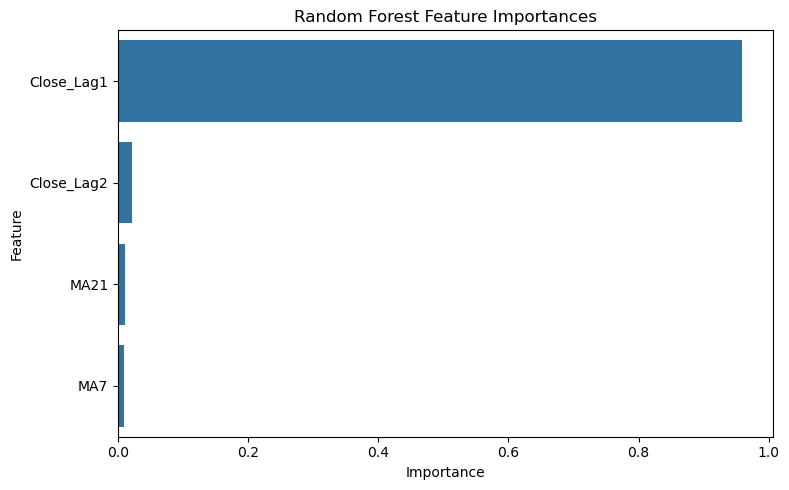

In [100]:
plt.figure(figsize=(8, 5))  # Plot ka size set
sns.barplot(x=features_sorted.values, y=features_sorted.index)  # Barplot draw
plt.title("Random Forest Feature Importances")  # Title
plt.xlabel("Importance")  # X-axis label
plt.ylabel("Feature")     # Y-axis label
plt.tight_layout()        # Clean layout
plt.show()                # Final plot show
